In [11]:
# Start of question 1.a:
# Load and preprocess the data using Pandas or Numpy and, if necessary, preprocessing
# functions from scikit-learn. The provided data is already normalized (see description),
# so there is no need for additional normalization. Compute and display basic statistics
# (mean, standard deviation, min, max, etc.) for each of the variables in the data set.
# Separate the target attribute for regression.

In [12]:
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, SGDRegressor
import numpy as np
import pylab as pl
import pandas as pd

In [13]:
cd csc478\communities

[Error 3] The system cannot find the path specified: u'csc478/communities'
C:\Users\Shawn\csc478\communities


In [14]:
vs = pd.read_csv("communities.csv")

In [15]:
vs.describe(include = "all")

,state,communityname,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,...,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans,ViolentCrimesPerPop
count,1994.000000,1994,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,...,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000,1994.000000
unique,NaN,1828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Jacksonvillecity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,28.683551,NaN,0.057593,0.463395,0.179629,0.753716,0.153681,0.144022,0.424218,0.493867,...,0.022778,0.215552,0.608892,0.535050,0.626424,0.651530,0.065231,0.232854,0.161685,0.237979
std,16.397553,NaN,0.126906,0.163717,0.253442,0.244039,0.208877,0.232492,0.155196,0.143564,...,0.100400,0.231134,0.204329,0.181352,0.200521,0.198221,0.109459,0.203092,0.229055,0.232985
min,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,NaN,0.010000,0.350000,0.020000,0.630000,0.040000,0.010000,0.340000,0.410000,...,0.000000,0.060000,0.470000,0.420000,0.520000,0.560000,0.020000,0.100000,0.020000,0.070000
50%,34.000000,NaN,0.020000,0.440000,0.060000,0.850000,0.070000,0.040000,0.400000,0.480000,...,0.000000,0.130000,0.630000,0.540000,0.670000,0.700000,0.040000,0.170000,0.070000,0.150000
75%,42.000000,NaN,0.050000,0.540000,0.230000,0.940000,0.170000,0.160000,0.470000,0.540000,...,0.000000,0.280000,0.777500,0.660000,0.770000,0.790000,0.070000,0.280000,0.190000,0.330000


In [16]:
vs.dtypes

state                      int64
communityname             object
population               float64
householdsize            float64
racepctblack             float64
racePctWhite             float64
racePctAsian             float64
racePctHisp              float64
agePct12t21              float64
agePct12t29              float64
agePct16t24              float64
agePct65up               float64
numbUrban                float64
pctUrban                 float64
medIncome                float64
pctWWage                 float64
pctWFarmSelf             float64
pctWInvInc               float64
pctWSocSec               float64
pctWPubAsst              float64
pctWRetire               float64
medFamInc                float64
perCapInc                float64
whitePerCap              float64
blackPerCap              float64
indianPerCap             float64
AsianPerCap              float64
OtherPerCap               object
HispPerCap               float64
NumUnderPov              float64
          

In [17]:
communityData = np.genfromtxt("communities.csv", delimiter=",",dtype=float)
communityData.shape

(1995L, 100L)

In [18]:
communityData = np.delete(communityData, 0, 0) # Remove the head line
communityData.shape

(1994L, 100L)

In [19]:
target = communityData[:,-1] # ViolentCrimesPerPop is target data
target[0:5]

array([ 0.2 ,  0.67,  0.43,  0.12,  0.03])

In [20]:
communityData = np.delete(communityData, 0, 1) # Remove "state"
communityData = np.delete(communityData, 0, 1) # Remove "communityname"
communityData = np.delete(communityData, -1, 1) # Remove "ViolentCrimesPerPop"
communityData

array([[ 0.19,  0.33,  0.02, ...,  0.12,  0.26,  0.2 ],
       [ 0.  ,  0.16,  0.12, ...,  0.02,  0.12,  0.45],
       [ 0.  ,  0.42,  0.49, ...,  0.01,  0.21,  0.02],
       ..., 
       [ 0.16,  0.37,  0.25, ...,  0.08,  0.32,  0.18],
       [ 0.08,  0.51,  0.06, ...,  0.03,  0.38,  0.33],
       [ 0.2 ,  0.78,  0.14, ...,  0.11,  0.3 ,  0.05]])

In [21]:
communityData.shape

(1994L, 97L)

In [22]:
# Found that there is a value missing in the data
communityData[130][25]

nan

In [23]:
# Replace it with mean value of OtherPerCap
communityData[130][25] = (communityData[:130][25].sum() + communityData[131:][25].sum()) / 1993
communityData[130][25]

0.037772202709483192

In [24]:
# End of question 1.a.

# Start of question 1.b:
# Perform standard linear regression on data using the implementation for Ch. 8 of MLA.
# Compute the RMSE value on the full training data. Also, plot the correlation between
# the predicted and actual values of the target attribute. Display the obtained regression
# coefficients (weights). Finally, perform 10-fold cross-validation using the learned
# model and compare the final RMSE to the training RMSE (for cross validation, you may
# use the KFold module from sklearn.cross_validation).

In [25]:
# In order to do multiple regression we need to add a column of 1s for x0
x = np.array([np.concatenate((v,[1])) for v in communityData])
y = target

In [26]:
# First 3 elements of the data
np.set_printoptions(precision=2, linewidth=120, suppress=True, edgeitems=4)
print x[:3]

[[ 0.19  0.33  0.02  0.9   0.12  0.17  0.34  0.47  0.29  0.32  0.2   1.    0.37  0.72  0.34  0.6   0.29  0.15  0.43
   0.39  0.4   0.39  0.32  0.27  0.27  0.36  0.41  0.08  0.19  0.1   0.18  0.48  0.27  0.68  0.23  0.41  0.68  0.4   0.75
   0.75  0.35  0.55  0.59  0.61  0.56  0.74  0.76  0.04  0.14  0.03  0.24  0.27  0.37  0.39  0.07  0.07  0.08  0.08
   0.89  0.06  0.14  0.13  0.33  0.39  0.28  0.55  0.09  0.51  0.5   0.21  0.71  0.52  0.05  0.26  0.65  0.14  0.06
   0.22  0.19  0.18  0.36  0.35  0.38  0.34  0.38  0.46  0.25  0.04  0.    0.12  0.42  0.5   0.51  0.64  0.12  0.26  0.2
   1.  ]
 [ 0.    0.16  0.12  0.74  0.45  0.07  0.26  0.59  0.35  0.27  0.02  1.    0.31  0.72  0.11  0.45  0.25  0.29  0.39
   0.29  0.37  0.38  0.33  0.16  0.3   0.22  0.35  0.01  0.24  0.14  0.24  0.3   0.27  0.73  0.57  0.15  1.    0.63
   0.91  1.    0.29  0.43  0.47  0.6   0.39  0.46  0.53  0.    0.24  0.01  0.52  0.62  0.64  0.63  0.25  0.27  0.25
   0.23  0.84  0.1   0.16  0.1   0.17  0.29  0.17  0

In [27]:
# First 10 elements of the response variable
print y[:10]

[ 0.2   0.67  0.43  0.12  0.03  0.14  0.03  0.55  0.53  0.15]


In [28]:
# Create linear regression object
linreg = LinearRegression()

# Train the model using the training sets
linreg.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
# Let's see predictions for the first 10 instances
print linreg.predict(x[:10])

[ 0.17  0.29  0.38  0.32 -0.02  0.23  0.09  0.44  0.24  0.  ]


In [30]:
# Compute RMSE on training data
# p = np.array([linreg.predict(xi) for xi in x])
p = linreg.predict(x)
# Now we can constuct a vector of errors
err = abs(p - y)

# Let's see the error on the first 10 predictions
print err[:10]

[ 0.03  0.38  0.05  0.2   0.05  0.09  0.06  0.11  0.29  0.15]


In [31]:
# Dot product of error vector with itself gives us the sum of squared errors
total_error = np.dot(err,err)
# Compute RMSE
rmse_train = np.sqrt(total_error / len(p))
print rmse_train

0.128875589759


In [32]:
# We can view the regression coefficients
print 'Regression Coefficients: \n', linreg.coef_

Regression Coefficients: 
[ 0.13 -0.03  0.21 -0.04 -0.01  0.06  0.12 -0.22 -0.15  0.05 -0.24  0.05 -0.2  -0.21  0.05 -0.18  0.06  0.01 -0.09  0.27
  0.1  -0.33 -0.03 -0.04  0.02  0.04  0.03  0.13 -0.19 -0.1   0.06  0.11  0.    0.23 -0.04 -0.01  0.47  0.23  0.17 -0.58
 -0.14  0.06 -0.35 -0.04  0.    0.06 -0.18 -0.15  0.13 -0.14  0.02  0.03 -0.07  0.04 -0.03 -0.22  0.45 -0.2  -0.03 -0.14
  0.06 -0.21  0.65 -0.08 -0.25 -0.67  0.2   0.1   0.03  0.17 -0.04  0.55  0.05 -0.08 -0.03  0.01 -0.01 -0.35  0.27  0.01
 -0.24 -0.03 -0.07  0.37  0.04 -0.04 -0.08  0.13  0.18  0.13  0.   -0.02  0.03  0.01  0.03 -0.01 -0.04  0.  ]


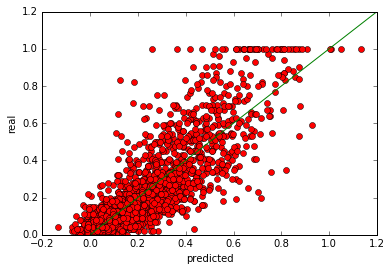

In [33]:
# Plot outputs
%matplotlib inline
pl.plot(p, y,'ro')
pl.plot([0,1.2],[0,1.2], 'g-')
pl.xlabel('predicted')
pl.ylabel('real')
pl.show()

In [34]:
# Now let's compute RMSE using 10-fold x-validation
kf = KFold(len(x), n_folds=10)
xval_err = 0
for train, test in kf:
    linreg.fit(x[train],y[train])
    p = linreg.predict(x[test])
    e = p-y[test]
    xval_err += np.dot(e,e)
    
rmse_10cv = np.sqrt(xval_err/len(x))

In [35]:
method_name = 'Simple Linear Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Simple Linear Regression
RMSE on training: 0.1289
RMSE on 10-fold CV: 0.1363


In [36]:
# End of question 1.b

# Start of question 1.c:
# Feature Selection: use the scikit-learn regression model from sklearn.linear_model
# with a subset of features to perform linear regression. For feature selection,
# write a script or function to takes as input the training data and target attribute,
# the model, and any other parameters you find necessary, and returns the optimal
# percentage of the most informative features to use. Your approach should use k-fold
# cross-validation on the training data (you can use k=5). You can use feature_selection.
# SelectPercentile to find the most informative variables. Show the list of most
# informative variables and their weights [Note: since this is regression not 
# classification, you should use feature_selection.f_regression as scoring function
# rather than chi2). Next, plot the model's mean absolute error values on cross-validation
# relative to the percentage of selected features (See scikit-learn's
# metrics.mean_absolute_error). In order to use cross_validation.cross_val_score with
# regression you'll need to pass to it scoring='mean_absolute_error' as a parameter.
# Once, you have determined the best set of features, run the model with that feature
# subset on the set-aside test data. [Hint: for an example of a similar feature selection
# process please review the class example notebook. Also, review scikit-learn
# documentation for feature selection.]

In [37]:
%pylab inline
import matplotlib.pyplot as plt

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [38]:
vsNames = vs.columns.values
vsNames

array(['state', 'communityname', 'population', 'householdsize', 'racepctblack', 'racePctWhite', 'racePctAsian',
       'racePctHisp', 'agePct12t21', 'agePct12t29', 'agePct16t24', 'agePct65up', 'numbUrban', 'pctUrban', 'medIncome',
       'pctWWage', 'pctWFarmSelf', 'pctWInvInc', 'pctWSocSec', 'pctWPubAsst', 'pctWRetire', 'medFamInc', 'perCapInc',
       'whitePerCap', 'blackPerCap', 'indianPerCap', 'AsianPerCap', 'OtherPerCap', 'HispPerCap', 'NumUnderPov',
       'PctPopUnderPov', 'PctLess9thGrade', 'PctNotHSGrad', 'PctBSorMore', 'PctUnemployed', 'PctEmploy', 'PctEmplManu',
       'PctEmplProfServ', 'MalePctDivorce', 'MalePctNevMarr', 'FemalePctDiv', 'TotalPctDiv', 'PersPerFam', 'PctFam2Par',
       'PctKids2Par', 'PctYoungKids2Par', 'PctTeen2Par', 'PctWorkMomYoungKids', 'PctWorkMom', 'NumIlleg', 'PctIlleg',
       'NumImmig', 'PctImmigRecent', 'PctImmigRec5', 'PctImmigRec8', 'PctImmigRec10', 'PctRecentImmig', 'PctRecImmig5',
       'PctRecImmig8', 'PctRecImmig10', 'PctSpeakEnglOnly', 

In [39]:
vsTarget = vs['ViolentCrimesPerPop'] # Split the target data
vsTrain = vs[vsNames[2:-1]] # Remove "state", "communityname" and target data
vsTrain.head()

,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,...,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LandArea,PopDens,PctUsePubTrans
0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,...,0.04,0.0,0.12,0.42,0.50,0.51,0.64,0.12,0.26,0.20
1,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,...,0.00,0.0,0.21,0.50,0.34,0.60,0.52,0.02,0.12,0.45
2,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,...,0.00,0.0,0.14,0.49,0.54,0.67,0.56,0.01,0.21,0.02
3,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,...,0.00,0.0,0.19,0.30,0.73,0.64,0.65,0.02,0.39,0.28
4,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,...,0.00,0.0,0.11,0.72,0.64,0.61,0.53,0.04,0.09,0.02


In [40]:
# Fix the missing value
vsTrain['OtherPerCap'][130] = communityData[130][25]

D:\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2885: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


In [41]:
vsTrain['OtherPerCap'][130]

0.037772202709483192

In [42]:
from sklearn.cross_validation import train_test_split
from sklearn import feature_selection
from sklearn import cross_validation
from sklearn.metrics import mean_squared_error

In [44]:
# Create the feature selection function
def fselection (X_train, y_train, lr_model):
    percentiles = range(1, 100, 5)
    results = []
    for i in range(1, 100, 5):
        fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = i)
        X_train_fs = fs.fit_transform(X_train, y_train)
        scores = cross_validation.cross_val_score(lr_model, X_train_fs, y_train, scoring='mean_absolute_error', cv=5)
        print i, abs(scores.mean())
        results = np.append(results, abs(scores.mean()))
    optimal_percentil = np.where(results == results.min())[0]
    print "Optimal percentile of features:{0}%".format(percentiles[optimal_percentil[0]]), "\n"
    optimal_num_features = int(floor(percentiles[optimal_percentil[0]] * len(X_train.columns)/100))
    print "Optimal number of features:{0}".format(optimal_num_features), "\n"
    # Plot percentile of features VS. cross-validation scores
    pl.figure()
    pl.xlabel("Percentage of features selected")
    pl.ylabel("Mean absolute error values")
    pl.plot(percentiles,results)

In [45]:
# Split trainning and test data set
X_train, X_test, y_train, y_test = train_test_split(vsTrain, vsTarget, test_size=0.2, random_state=33)

1 0.112874011634
6 0.0994326847568
11 0.0990051051913
16 0.0990905907953
21 0.0975068622131
26 0.0960890453654
31 0.094784802702
36 0.09474955355
41 0.0943537042886
46 0.0946644176057
51 0.0949877334678
56 0.0953208516481
61 0.0957496688925
66 0.0957208954492
71 0.0958313222977
76 0.0951915736978
81 0.0954353742899
86 0.0951496096313
91 0.095263075006
96 0.0952856972264
Optimal percentile of features:41% 

Optimal number of features:39 



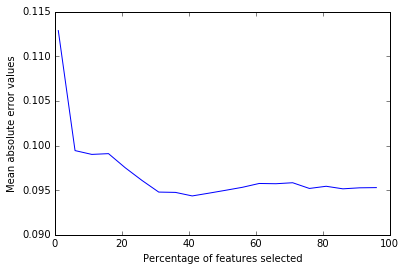

In [46]:
# Try to find the best number of features
lr_model = LinearRegression()
fselection(X_train, y_train, lr_model)

In [48]:
# Run the model with that feature subset on the set-aside test data.
fs = feature_selection.SelectPercentile(feature_selection.f_regression, percentile = 41)
X_train_fs = fs.fit_transform(X_test, y_test)
scores = cross_validation.cross_val_score(lr_model, X_train_fs, y_test, scoring='mean_absolute_error', cv=5)
print abs(scores)

[ 0.12  0.13  0.11  0.1   0.11]


In [50]:
# Mean abosolute error for 5 fold cross validation
print abs(scores.mean())

0.114343997235


In [52]:
# End of question 1c.

# Start of question 1d:
# Next, perform Ridge Regression and Lasso Regression, however this time use
# the modules from sklearn.linear_model. In each case, perform systematic model
# selection to identify the optimal alpha parameter. First, create a 20%-80%
# randomized split of the data. Set aside the test portion; the model selection
# process should be performed using the 80% training data partition. You should
# create a function that takes as input the data and target attribute; the 
# parameter to vary and a list of its values, the model to be trained, and any
# other relevant input needed to determine the optimal value for the specified
# parameter. The model selection process should perform k-fold cross validation
# (k should be a parameter, but you can select k=5 for this problem). You should
# also plot the error values on the training and cross-validation splits across
# the specified values of the alpha parameter. Finally, using the best alpha
# value, run the model on the set-aside test data. Discuss your observation and
# conclusions. [Hint: for an example of a similar model selection process please
# review the class example notebook.]

In [57]:
def calc_params(X, y, model_name, param_values, param_name, K):
    
    # Convert input to Numpy arrays
    X = np.array(X)
    y = np.array(y)
    results = []
    # initialize training and testing scores with zeros
    train_scores = np.zeros(len(param_values))
    test_scores = np.zeros(len(param_values))
    # iterate over the different parameter values
    if model_name == "lasso":
        lr_model = Lasso()
    if model_name == "ridge":
        lr_model = Ridge()
    else:
        # For question 1.e:
        lr_model = SGDRegressor(penalty='elasticnet')
    for i, param_value in enumerate(param_values):
        # print param_name, ' = ', param_value
        
        # set liner regression parameters
        lr_model.set_params(**{param_name:param_value})
        
        # initialize the K scores obtained for each fold
        k_train_scores = np.zeros(K)
        k_test_scores = np.zeros(K)
        
        # create KFold cross validation
        cv = KFold(len(X), K, shuffle=True, random_state=0)
        
        # iterate over the K folds
        for j, (train, test) in enumerate(cv):
            # fit the liner regression model in the corresponding fold
            # and obtain the corresponding accuracy scores on train and test sets
            lr_model.fit([X[k] for k in train], y[train])
            k_train_scores[j] = lr_model.score([X[k] for k in train], y[train])
            k_test_scores[j] = lr_model.score([X[k] for k in test], y[test])
            
        # store the mean of the K fold scores
        train_scores[i] = np.mean(k_train_scores)
        results = np.append(results, train_scores[i])
        optimal_parameter = np.where(results == results.max())[0]
        
        test_scores[i] = np.mean(k_test_scores)
       
    # plot the training and testing scores in a log scale
    plt.plot(param_values, train_scores, label='Train', alpha=0.4, lw=2, c='b')
    plt.plot(param_values, test_scores, label='X-Val', alpha=0.4, lw=2, c='g')
    plt.legend(loc=7)
    plt.xlabel(param_name + " values")
    plt.ylabel("Mean cross validation accuracy")

    # return the training and testing scores on each parameter value
    return train_scores, test_scores,optimal_parameter

In [58]:
alpha = np.linspace(.01, 20, 50)
print alpha

[  0.01   0.42   0.83   1.23   1.64   2.05   2.46   2.87   3.27   3.68   4.09   4.5    4.91   5.31   5.72   6.13   6.54
   6.95   7.35   7.76   8.17   8.58   8.99   9.39   9.8   10.21  10.62  11.02  11.43  11.84  12.25  12.66  13.06  13.47
  13.88  14.29  14.7   15.1   15.51  15.92  16.33  16.74  17.14  17.55  17.96  18.37  18.78  19.18  19.59  20.  ]


optimal_parameter should be 0.0100


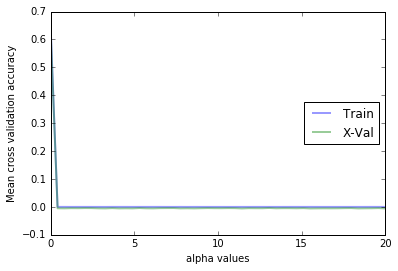

In [81]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=33)
train_scores, test_scores, optimal_parameter = calc_params(X_train, y_train, "lasso", alpha, 'alpha', 5)
alpha_best_lasso=alpha[optimal_parameter[0]]
print ("optimal_parameter should be %.4f"%alpha[optimal_parameter])

optimal_parameter should be 0.0100


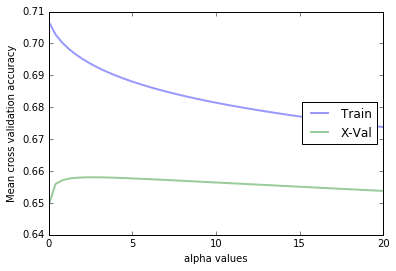

In [82]:
train_scores, test_scores, optimal_parameter = calc_params(X_train, y_train, "ridge", alpha, 'alpha', 5)
alpha_best_ridge=alpha[optimal_parameter[0]]
print ("optimal_parameter should be %.4f"%alpha[optimal_parameter])

In [83]:
ridge=Ridge(fit_intercept=True, alpha=alpha_best_ridge)
ridge.fit(X_test,y_test)
p = ridge.predict(X_test)
err = p-y_test
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
kf = KFold(len(X_test), n_folds=5)
xval_err = 0
for train,test in kf:
    ridge.fit(X_test[train],y_test[train])
    p = ridge.predict(X_test[test])
    e = p-y_test[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

method_name = 'Ridge Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)


lasso=Lasso(fit_intercept=True, alpha=alpha_best_lasso)
lasso.fit(X_test,y_test)
p = lasso.predict(X_test)
err = p-y_test
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
kf = KFold(len(X_test), n_folds=5)
xval_err = 0
for train,test in kf:
    lasso.fit(X_test[train],y_test[train])
    p = lasso.predict(X_test[test])
    e = p-y_test[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

method_name = 'Lasso Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Ridge Regression
RMSE on training: 0.1194
RMSE on 10-fold CV: 0.0772
Method: Lasso Regression
RMSE on training: 0.1632
RMSE on 10-fold CV: 0.0750


In [86]:
# As we can find from above results:
# By using the Ridge and Lasso regression method, the best alpha should be 0.01.
# The RMSE on 10-fold cv is more stable.
# End of question 1.d

# Start of question 1.e
# Next, perform regression using Stochastic Gradient Descent for regression. For this part,
# you should use the SGDRegessor module from sklearn.linear_model. Again, start with
# creating randomized 80%-20% train-test split. SGDRegessor requires that features be
# standardized (with 0 mean and scaled by standard deviation). Prior to fiting the model,
# perform the scaling using StandardScaler from sklearn.preprocessing. For this problem,
# perform a grid search (using GridSearchCV from sklearn.grid_search) Your grid search
# should compare combinations of two penalty parameters ('l2', 'l1') and different values
# of alpha (alpha could vary from 0.0001 which is the default to relatively large values).
# Using the best parameters, apply the model to the set-aside test data. Finally, perform
# model selection (similar to part d, above) to find the best "l1_ratio" parameter using
# SGDRegressor with  the "elasticnet" penalty parameter. [Note: "l1_ratio" is The Elastic
# Net mixing parameter, with 0 <= l1_ratio <= 1;  l1_ratio=0 corresponds to L2 penalty,
# l1_ratio=1 to L1 penalty; defaults to 0.15.] Using the best mixing ratio, apply the Elastic
# Net model to the set-aside test data. Provide a summary of your findings from the above experiments.

In [92]:
from sklearn.preprocessing import StandardScaler
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import SGDRegressor

X_train, X_test, y_train, y_test = train_test_split(x, y , test_size=0.2, random_state=33)
scaler = StandardScaler()
scaler.fit(X_train)
x_s = scaler.transform(X_train)
x_s_test = scaler.transform(X_test)

parameters = {
    'penalty': ['l2','l1'],
    'alpha': np.linspace(0.01,20,10)
   }
gs = GridSearchCV(SGDRegressor(), parameters, n_jobs= 1, cv=5, verbose=1)
%time _ = gs.fit(x_s, y_train)
gs.best_params_, gs.best_score_

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=1)]: Done  49 tasks       | elapsed:    0.3s


Wall time: 724 ms


[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.6s finished


({'alpha': 0.01, 'penalty': 'l2'}, 0.64932022764614106)

In [94]:
sgdreg = SGDRegressor(penalty='l2', alpha = 0.01)

# Compute RMSE on training data
sgdreg.fit(x_s_test,y_test)
p = sgdreg.predict(x_s_test)
err = p-y_test
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
kf = KFold(len(X_test), n_folds=10)
xval_err = 0
for train,test in kf:
    scaler = StandardScaler()
    scaler.fit(X_test[train])  # Don't cheat - fit only on training data
    xtrain_s = scaler.transform(X_test[train])
    xtest_s = scaler.transform(X_test[test])  # apply same transformation to test data
    sgdreg.fit(xtrain_s,y_test[train])
    p = sgdreg.predict(xtest_s)
    e = p-y_test[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Stochastic Gradient Descent Regression
RMSE on training: 0.1334
RMSE on 10-fold CV: 0.0685


In [95]:
l1_ratio = np.linspace(0.0,1,20)
print l1_ratio

[ 0.    0.05  0.11  0.16  0.21  0.26  0.32  0.37  0.42  0.47  0.53  0.58  0.63  0.68  0.74  0.79  0.84  0.89  0.95  1.  ]


optimal_parameter should be 0.4211


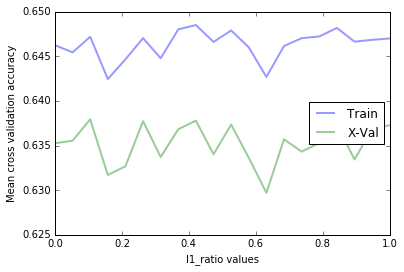

In [98]:
train_scores, test_scores, optimal_parameter = calc_params(X_train, y_train, "SGDRegressor", l1_ratio, 'l1_ratio', 5)
print ("optimal_parameter should be %.4f"%l1_ratio[optimal_parameter])

In [99]:

sgdreg = SGDRegressor(penalty='elasticnet',l1_ratio=l1_ratio[optimal_parameter])

# Compute RMSE on training data
sgdreg.fit(x_s_test,y_test)
p = sgdreg.predict(x_s_test)
err = p-y_test
total_error = np.dot(err,err)
rmse_train = np.sqrt(total_error/len(p))

# Compute RMSE using 10-fold x-validation
kf = KFold(len(X_test), n_folds=10)
xval_err = 0
for train,test in kf:
    scaler = StandardScaler()
    scaler.fit(X_test[train])  # Don't cheat - fit only on training data
    xtrain_s = scaler.transform(X_test[train])
    xtest_s = scaler.transform(X_test[test])  # apply same transformation to test data
    sgdreg.fit(xtrain_s,y_test[train])
    p = sgdreg.predict(xtest_s)
    e = p-y_test[test]
    xval_err += np.dot(e,e)
rmse_10cv = np.sqrt(xval_err/len(x))

method_name = 'Stochastic Gradient Descent Regression'
print('Method: %s' %method_name)
print('RMSE on training: %.4f' %rmse_train)
print('RMSE on 10-fold CV: %.4f' %rmse_10cv)

Method: Stochastic Gradient Descent Regression
RMSE on training: 0.1340
RMSE on 10-fold CV: 0.0678


In [100]:
# According to the above results:
# The RMSE on 10 fold cv is more stable
# The best parameter should be 'alpha': 0.01, 'penalty': 'l2'.
# The best l1_ratio should be 0.4, but the result can change everytime we run the model selection.
# End of question 1.e

# Start of question 2a:
# Create your own distance function that, instead of using Euclidean distance, uses Cosine
# similarity. This is the distance function you will use to pass to the kMeans function.

In [101]:
import sklearn as skl
from sklearn.cluster import KMeans

In [102]:
def Cosine(vecA, vecB):
    return np.dot(vecA, vecB) / (np.linalg.norm(vecA) * np.linalg.norm(vecB))

In [ ]:
# End of question 2a.

# Start of question 2b:
# Load the data set [Note: the data matrix provided has terms as rows and documents as
# columns. Since you will be clustering documents, you'll need to take the transpose
# of this matrix so that your main data matrix is a document x term matrix. In Numpy,
# you may use the ".T" operation to obtain the transpose.] Then, split the data set
# (the document x term matrix) and set aside 20% for later use (see below). Use the 80%
# segment for clustering in the next part. The 20% portion must be a random subset.

In [103]:
cd C:\Users\Shawn\csc478\newsgroups5

C:\Users\Shawn\csc478\newsgroups5


In [104]:
data_newsgroup = np.genfromtxt("matrix.txt", delimiter=",", dtype=None).T

In [105]:
classes = np.genfromtxt("classes.txt", delimiter=" ", dtype=None, skip_header=True)
terms = np.genfromtxt("terms.txt", dtype=None)
cluster_names = ["windows", "crypt", "christian", "hockey", "forsale"]

In [106]:
print data_newsgroup.shape, classes.shape, terms.shape
print data_newsgroup
print classes
print terms
print cluster_names[0]

(2500L, 9328L) (2500L, 2L) (9328L,)
[[0 0 0 0 ..., 0 0 0 0]
 [0 0 0 0 ..., 0 0 0 0]
 [0 0 0 0 ..., 0 0 0 0]
 [0 0 0 0 ..., 0 0 0 0]
 ..., 
 [0 0 0 0 ..., 0 0 0 0]
 [0 0 0 0 ..., 0 0 0 0]
 [0 0 0 0 ..., 0 0 0 0]
 [0 0 0 0 ..., 0 0 0 0]]
[[   0    0]
 [   1    1]
 [   2    1]
 [   3    1]
 ..., 
 [2496    4]
 [2497    3]
 [2498    4]
 [2499    2]]
['aa' 'aargh' 'aaron' 'aaronc' ..., 'zv' 'zw' 'zx' 'zz']
windows


In [109]:
# End of question 2b.

# Start of question 2c:
# As in the case of Assignment 2, transform the term-frequencies to tfxidf values. Be sure
# to maintain DF values for each of the terms in the dictionary. [Note: if you run into
# problems due to limited computational resources, you may prune the data by removing all
# terms with low DF values, e.g., terms that appear in less than 10 documents. Be sure to
# maintain the correspondence between the dictionary terms and the matrix rows.]

In [107]:
N = data_newsgroup.shape[0]
DF = np.array(data_newsgroup > 0).sum(axis=0)
print DF.shape
IDF = np.log2(float(N) / DF)
print IDF.shape
 
data_idf = data_newsgroup * IDF
print data_idf.shape
print data_idf[:50,:50]

(9328L,)
(9328L,)
(2500L, 9328L)
[[ 0.    0.    0.    0.   ...,  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   ...,  0.    6.83  0.    0.  ]
 [ 0.    0.    0.    0.   ...,  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   ...,  0.    0.    0.    0.  ]
 ..., 
 [ 0.    0.    0.    0.   ...,  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   ...,  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   ...,  0.    0.    0.    0.  ]
 [ 0.    0.    0.    0.   ...,  0.    0.    0.    0.  ]]


In [108]:
dataSet_80, dataSet_20, classes_80, classes_20 = skl.cross_validation.train_test_split(data_idf, classes, test_size=0.2)
print dataSet_80.shape, dataSet_20.shape, classes_80.shape, classes_20.shape

(2000L, 9328L) (500L, 9328L) (2000L, 2L) (500L, 2L)


In [110]:
# End of question 2c.

# Start of question 2d:
# Perform Kmeans clustering on the training data. Write a function to display the top N terms
# in each cluster along with the cluster DF values for each term, percentage of docs in the
# cluster in which the terms appear, and the size of the cluster. Sort the terms in decreasing
# order of the DF percentage. [Extra Credit: use your favorite third party tool, ideally with
# a Python based API, to create a word cloud for each cluster based on the in-cluster DF values.]

In [121]:
from sklearn.cluster import KMeans
import kMeans

In [122]:
def distCosine(vecA, vecB):
    return 1 - ((np.dot(vecA, vecB)) / (np.linalg.norm(vecA) * np.linalg.norm(vecB)))

In [124]:
# Since Euclidean distance assigns almost all instance into one cluster, I use (1 - Cosine similarity).
centroids, clusters = kMeans.kMeans(dataSet_80, 5, distCosine, kMeans.randCent)

In [125]:
def display(dataset, clusters, classes, cluster_names, N):
    #define arrays of each cluster
    cluster_arrays = {}
    for t in range(len(cluster_names)):
        cluster_arrays[cluster_names[t]] = np.array([dataset[i] for i in range(len(dataset)) if clusters[i,0] == t])
        #print cluster_names[t], cluster_arrays[cluster_names[t]].shape
    #compute DF of each cluster
    cluster_df = {}
    for label in cluster_names:
        size = cluster_arrays[label].shape[0]
        df = np.array(cluster_arrays[label]>0).sum(axis=0)
        cluster_df[label] = np.array([terms[(df.argsort(axis=0)[::-1])[:N]], df[(df.argsort(axis=0)[::-1])[:N]], df[(df.argsort(axis=0)[::-1])[:N]] / float(size)]).T
        print "Cluster: %s\nCluster Size:%d"%(label, size)
        for i in range(N):
            print cluster_df[label][i][0],"\t\t",cluster_df[label][i][1],"\t",cluster_df[label][i][2]
        #print cluster_df[label]
        

In [126]:
display(dataSet_80, clusters, classes, cluster_names, 5)

Cluster: windows
Cluster Size:789
write 		484 	0.613434727503
on 		388 	0.491761723701
articl 		376 	0.476552598226
think 		294 	0.372623574144
know 		289 	0.36628643853
Cluster: crypt
Cluster Size:289
window 		198 	0.685121107266
file 		130 	0.449826989619
write 		127 	0.439446366782
program 		101 	0.349480968858
know 		100 	0.346020761246
Cluster: christian
Cluster Size:8
ax 		7 	0.875
max 		7 	0.875
pl 		6 	0.75
cliff 		6 	0.75
wt 		6 	0.75
Cluster: hockey
Cluster Size:374
write 		251 	0.671122994652
kei 		192 	0.513368983957
articl 		189 	0.505347593583
clipper 		187 	0.5
encrypt 		178 	0.475935828877
Cluster: forsale
Cluster Size:540
sale 		238 	0.440740740741
email 		178 	0.32962962963
pleas 		173 	0.32037037037
thank 		143 	0.264814814815
on 		137 	0.253703703704


In [127]:
# End of question 2d.

# Start of question 2e:
# Using the cluster assignments from Kmeans clustering, compare your 5 clusters to the
# 5 pre-assigned classes by computing the Completeness and Homogeneity values.

In [128]:
from sklearn.metrics import completeness_score, homogeneity_score
 
newC = np.ravel(clusters.T[0]).astype(int)
#print newC, newC.shape
#print classes_80[:,1], classes_80[:,1].shape
print "Completeness: ",completeness_score(classes_80[:,1], newC)
print "Homogeneity:  ",homogeneity_score(classes_80[:,1], newC)

Completeness:  0.733918454491
Homogeneity:   0.609084064826


In [129]:
# End of question 2e.

# Start of question 2f:
# Finally, using your cluster assignments as class labels, categorize each of the documents
# in the 20% set-aside data into each of the appropriate cluster. Your categorization should
# be based on Cosine similarity between each test document and each cluster centroids.
# Present your results in a separate file containing the obtained cluster label for each test
# document as well as Cosine similarities between each test document and each of the 5 clusters.

In [130]:
max_similarity = 0.0
fl = open("category.txt","w+")
for instance in dataSet_20:
    #compute the similarity of each centroids
    cos_list = np.array(np.zeros(len(centroids)), dtype=float)
    for i in range(len(centroids)):
        max_index = 0
        max_similarity = 0.0
        cos_list[i] = Cosine(centroids[i], instance)
        
    print "%10s\t%.4f\t%.4f\t%.4f\t%.4f\t%.4f"%(cluster_names[cos_list.argmax()], cos_list[0], cos_list[1],cos_list[2],cos_list[3],cos_list[4])
    fl.write("%10s\t%.4f\t%.4f\t%.4f\t%.4f\t%.4f\n"%(cluster_names[cos_list.argmax()], cos_list[0], cos_list[1],cos_list[2],cos_list[3],cos_list[4]));
    
    
fl.flush()
fl.close()

   windows	0.0950	0.0326	0.0000	0.0175	0.0140
   windows	0.0966	0.0253	0.0000	0.0248	0.0525
   forsale	0.0239	0.0222	0.0000	0.0236	0.0480
   forsale	0.0250	0.0299	0.0001	0.0193	0.0702
     crypt	0.0526	0.1152	0.0000	0.0553	0.0962
   forsale	0.0339	0.0419	0.0000	0.0446	0.0892
     crypt	0.0451	0.1129	0.0000	0.0450	0.0928
   forsale	0.0141	0.0412	0.0001	0.0287	0.1651
   windows	0.1299	0.0261	0.0000	0.0333	0.0384
   windows	0.1503	0.0321	0.0000	0.0408	0.0453
     crypt	0.0635	0.1081	0.0000	0.0481	0.0855
     crypt	0.0425	0.0797	0.0000	0.0623	0.0528
   forsale	0.0406	0.0391	0.0000	0.0389	0.0819
   windows	0.1532	0.0956	0.0000	0.0919	0.0977
   windows	0.0474	0.0078	0.0000	0.0237	0.0174
   forsale	0.0351	0.0200	0.0000	0.0208	0.0842
    hockey	0.1117	0.0490	0.0000	0.1535	0.0756
   windows	0.1166	0.0187	0.0000	0.0412	0.0369
     crypt	0.0426	0.1175	0.0000	0.0434	0.0989
   windows	0.1269	0.0361	0.0000	0.0488	0.0757
    hockey	0.0655	0.0569	0.0000	0.2323	0.0559
   windows	0.1290	0.0927	0.0000	0.

In [131]:
# End of question 2f.